In [49]:
import numpy as np
import keras
from keras import datasets, regularizers
from keras.models import Sequential  ### type of the model
from keras.layers import Dense ## type of layer
from tensorflow.keras import optimizers

In [30]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()   ### Load the dataset

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_test.shape

(10000, 28, 28)

In [33]:
y_test.ndim

1

In [34]:
y_test.shape

(10000,)

In [35]:
y_train = keras.utils.to_categorical(y_train, 10)  ### One Hot Encodeing of training data (10 classes = 10 columns)
y_test = keras.utils.to_categorical(y_test, 10)    ### One Hot Encodeing of test data

In [36]:
y_test.ndim

2

In [37]:
y_test.shape [1]

10

In [38]:
x_train.shape

(60000, 28, 28)

In [39]:
x_test.ndim     #### Stored as 3 rd ---> convert into 2d

3

In [40]:
x_train = x_train.reshape(60000, 784)   #  convert the 3D image into 2D image (28X28=784)
x_test = x_test.reshape(10000, 784)


In [41]:
x_train.shape [1]

784

In [50]:
x_train = x_train.astype('float32')/255   ### Scaling
x_test = x_test.astype('float32')/255

In [71]:
model = Sequential(
    [Dense(600, input_dim = x_train.shape [1], activation = 'relu'),   ### Input layers (input_dim)
     Dense(300, kernel_regularizer=regularizers.L2(l2=1e-5),activity_regularizer=regularizers.L2(1e-5) , activation = 'relu'),    ### Hidden layers
     Dense(150, kernel_regularizer=regularizers.L2(l2=1e-5),activity_regularizer=regularizers.L2(1e-5),activation = 'relu'),    ### Hidden layers
     Dense(75, kernel_regularizer=regularizers.L2(l2=1e-5),activity_regularizer=regularizers.L2(1e-5),activation = 'relu'),    ### Hidden layers
     Dense(y_test.shape[1], activation = 'softmax')])  ### Output layer ## Number of o/p = Number of classes = number of columns after the one hot encoding

In [72]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 600)                 │         471,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 300)                 │         180,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 708,535 (2.70 MB)

 Trainable params: 708,535 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
### Compile (loss ( regression: MSE- classification: categorical_crossentropy), Optimizer (learning rate), metrics ( for regression MSE, for classification accuracy))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'])

In [74]:
### Training the model ( ( x_train, y_tarin), epochs , batch size , validation ratio )
result=model.fit(x_train, y_train,epochs=30,batch_size=40,validation_split=0.2) ### Final training examples =48000 from the given 60000 samples

Epoch 1/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5980 - loss: 1.1675 - val_accuracy: 0.9080 - val_loss: 0.3578
Epoch 2/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9109 - loss: 0.3438 - val_accuracy: 0.9283 - val_loss: 0.2674
Epoch 3/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9437 - loss: 0.2193 - val_accuracy: 0.9543 - val_loss: 0.1845
Epoch 4/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9596 - loss: 0.1614 - val_accuracy: 0.9562 - val_loss: 0.1689
Epoch 5/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9652 - loss: 0.1376 - val_accuracy: 0.9600 - val_loss: 0.1535
Epoch 6/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.1170 - val_accuracy: 0.9646 - val_loss: 0.1455
Epoch 7/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9762 - loss: 0.0997 - val_accuracy: 0.9658 - val_loss: 0.1352
Epoch 8/30
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9790 - loss: 0.0896 - 

Text(0, 0.5, 'losss')

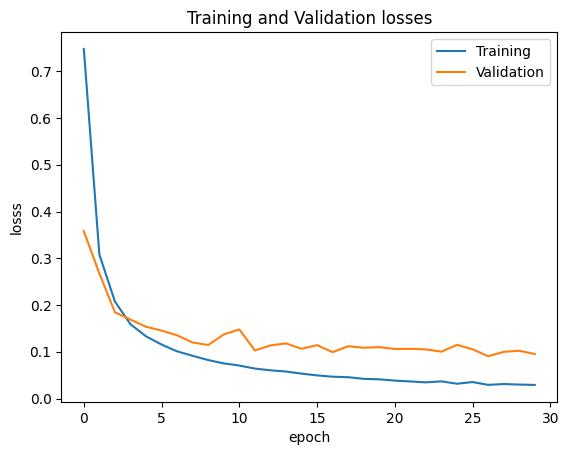

In [75]:
result.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('losss')

Text(0, 0.5, 'Accuracy')

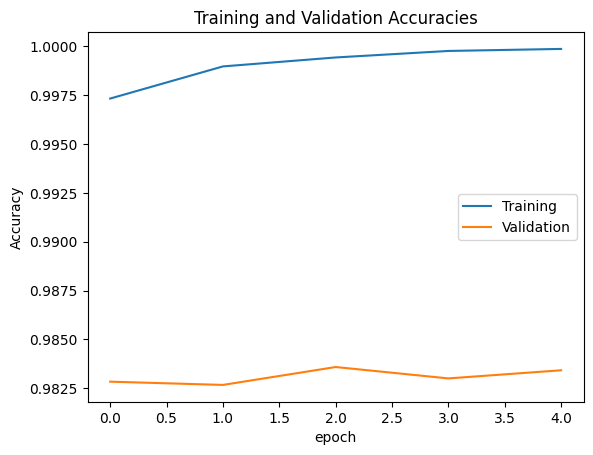

In [33]:
result.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracies')
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',1 -  score[0])
print('Test accuracy:', score[1])

Test loss: 0.8885366842150688
Test accuracy: 0.9782000184059143


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)[:5]
label = np.argmax(y_test,axis=1)[:5]
print(pred)
print(label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7 2 1 0 4]
[7 2 1 0 4]


In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'keras.utils.vis_utils'